# Notebook Vector_Calc course

In [2]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator
from matplotlib import rcParams

# default font family
rcParams['font.family'] = "Bitstream Vera Sans Mono"
rcParams['font.style'] = "italic"

import numpy as np

### 3d Arrow code

In [3]:
def arrow3d(ax, length=1, width=0.05, head=0.2, headwidth=2,
                theta_x=0, theta_z=0, offset=(0,0,0), **kw):
    w = width
    h = head
    hw = headwidth
    theta_x = np.deg2rad(theta_x)
    theta_z = np.deg2rad(theta_z)

    a = [[0,0],[w,0],[w,(1-h)*length],[hw*w,(1-h)*length],[0,length]]
    a = np.array(a)

    r, theta = np.meshgrid(a[:,0], np.linspace(0,2*np.pi,30))
    z = np.tile(a[:,1],r.shape[0]).reshape(r.shape)
    x = r*np.sin(theta)
    y = r*np.cos(theta)

    rot_x = np.array([[1,0,0],[0,np.cos(theta_x),-np.sin(theta_x) ],
                      [0,np.sin(theta_x) ,np.cos(theta_x) ]])
    rot_z = np.array([[np.cos(theta_z),-np.sin(theta_z),0 ],
                      [np.sin(theta_z) ,np.cos(theta_z),0 ],[0,0,1]])

    b1 = np.dot(rot_x, np.c_[x.flatten(),y.flatten(),z.flatten()].T)
    b2 = np.dot(rot_z, b1)
    b2 = b2.T+np.array(offset)
    x = b2[:,0].reshape(r.shape); 
    y = b2[:,1].reshape(r.shape); 
    z = b2[:,2].reshape(r.shape); 
    ax.plot_surface(x,y,z, **kw)

### fig_Vector_Calc_1a

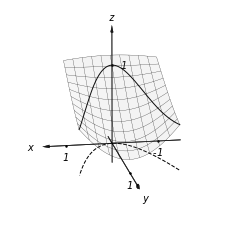

In [3]:
plotname = "fig_Vector_Calc_1a"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .85
ax.set_xlim(-1.5*scale, 1.5*scale)
ax.set_ylim(-.25*scale, 1.2*scale)
ax.set_zlim(-.25*scale, 1.5*scale)

# axis arrows
arrow3d(ax, length=3, width=0.005, head=0.05, headwidth=4, offset=[-1.5,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=1.75, width=0.007, head=0.05, headwidth=4, offset=[0,-.25,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=1.75, width=0.007, head=0.05, headwidth=4, offset=[0,0,-.25], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 80)
ax.axis("off")

tickpointsize = 2
ticksize=10
ticks = [-1, 1]
zoffset = -.15
for tick in ticks:
    ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
    ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick > 0:
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(-.25, 0, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(1.75, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 1.75, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 1.6, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-1, 1, N)
y = np.linspace(-.1, 1, N)
X, Y = np.meshgrid(x, y)
z = lambda x,y: 1- np.sin(y)*np.cos(x)

stride = 100
ax.plot_wireframe(X, Y, z(X,Y), color='k', linewidth=.25, rstride=stride, cstride=stride)
ax.plot_surface(X, Y, z(X,Y), color="white", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)

ax.plot(x, x**2, "--", c='k', linewidth=1)
ax.plot(x, x**2, z(x, x**2), c='k', linewidth=1)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_1b

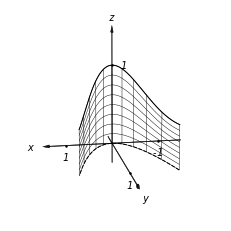

In [5]:
plotname = "fig_Vector_Calc_1b"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .85
ax.set_xlim(-1.5*scale, 1.5*scale)
ax.set_ylim(-.25*scale, 1.2*scale)
ax.set_zlim(-.25*scale, 1.5*scale)

# axis arrows
arrow3d(ax, length=3, width=0.005, head=0.05, headwidth=4, offset=[-1.5,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=1.75, width=0.007, head=0.05, headwidth=4, offset=[0,-.25,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=1.75, width=0.007, head=0.05, headwidth=4, offset=[0,0,-.25], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 80)
ax.axis("off")

tickpointsize = 2
ticksize=10
ticks = [-1, 1]
zoffset = -.15
for tick in ticks:
    ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
    ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick > 0:
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(-.25, 0, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(1.75, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 1.75, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 1.6, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-1, 1, N)
y = np.linspace(-.1, 1, N)
X, Y = np.meshgrid(x, y)
z = lambda x,y: 1- np.sin(y)*np.cos(x)

stride = 100
# ax.plot_wireframe(X, Y, z(X,Y), color='k', linewidth=.25, rstride=stride, cstride=stride)
# ax.plot_surface(X, Y, z(X,Y), color="white", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)

ax.plot(x, x**2, "--", c='k', linewidth=1)
ax.plot(x, x**2, z(x, x**2), c='k', linewidth=1)

for i in range(9):
        ax.plot(x, x**2, z(x, x**2)*i/8, c='k', linewidth=.45)

xs = np.linspace(-1, 1, 11)
for x in xs:
        ax.plot([x, x], [x**2, x**2], [0, z(x, x**2)], c='k', linewidth=.45)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_1c

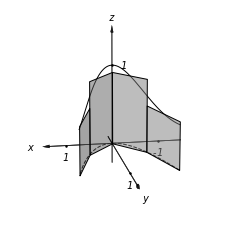

In [6]:
plotname = "fig_Vector_Calc_1c"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .85
ax.set_xlim(-1.5*scale, 1.5*scale)
ax.set_ylim(-.25*scale, 1.2*scale)
ax.set_zlim(-.25*scale, 1.5*scale)

# axis arrows
arrow3d(ax, length=3, width=0.005, head=0.05, headwidth=4, offset=[-1.5,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=1.75, width=0.007, head=0.05, headwidth=4, offset=[0,-.25,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=1.75, width=0.007, head=0.05, headwidth=4, offset=[0,0,-.25], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 80)
ax.axis("off")

tickpointsize = 2
ticksize=10
ticks = [-1, 1]
zoffset = -.15
for tick in ticks:
    ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
    ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick > 0:
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(-.25, 0, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(1.75, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 1.75, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 1.6, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-1, 1, N)
y = np.linspace(-.1, 1, N)
X, Y = np.meshgrid(x, y)
f = lambda x,y: 1 - np.sin(y)*np.cos(x)

stride = 100

ax.plot(x, x**2, "--", c='k', linewidth=1)
ax.plot(x, x**2, f(x, x**2), c='k', linewidth=1)

x = np.linspace(.5, 1, N)
y = np.linspace(0, .5, N)
X, Y = np.meshgrid(x, y)

a = .6

p1 = lambda x : a*x
x = np.linspace(0, a, N)
Z = np.linspace(0, f(a/2, (a/2)**2), N)
X, Z = np.meshgrid(x, Z)
ax.plot_surface(X, p1(X), Z, color="gray", ec="k", linewidth=1, alpha=.5, rstride=N, cstride=N)

p2 = lambda x : -a*x
x = np.linspace(-a, 0, N)
Z = np.linspace(0, f(a/2, (a/2)**2), N)
X, Z = np.meshgrid(x, Z)
ax.plot_surface(X, p2(X), Z, color="gray", ec="k", linewidth=1, alpha=.5, rstride=N, cstride=N)

p3 = lambda x : (a**2 - 1)*x/(a - 1) + 1 - (a**2 - 1)/(a - 1)
x = np.linspace(a, 1, N)
Z = np.linspace(0, f((1+a)/2, ((1+a)/2)**2), N)
X, Z = np.meshgrid(x, Z)
ax.plot_surface(X, p3(X), Z, color="gray", ec="k", linewidth=1, alpha=.5, rstride=N, cstride=N)

p4 = lambda x : -(a**2 - 1)*x/(a - 1) + 1 - (a**2 - 1)/(a - 1)
x = np.linspace(-1, -a, N)
Z = np.linspace(0, f((1+a)/2, ((1+a)/2)**2), N)
X, Z = np.meshgrid(x, Z)
ax.plot_surface(X, p4(X), Z, color="gray", ec="k", linewidth=1, alpha=.5, rstride=N, cstride=N)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_2a

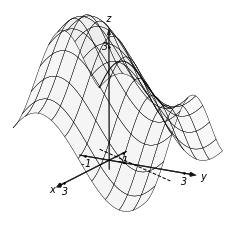

In [7]:
plotname = "fig_Vector_Calc_2a"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .95
ax.set_xlim(-1.25*scale, 3.25*scale)
ax.set_ylim(-1.25*scale, 3.25*scale)
ax.set_zlim(0*scale, 3.25*scale)

# axis arrows
arrow3d(ax, length=4.75, width=0.015, head=0.05, headwidth=4, offset=[-1.25,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=4.75, width=0.015, head=0.05, headwidth=4, offset=[0,-1.25,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=3.75, width=0.015, head=0.05, headwidth=4, offset=[0,0,-.25], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 30)
ax.axis("off")

tickpointsize = 2
ticksize=10
ticks = [-1, 3]
zoffset = -.2
for tick in ticks:
    ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
    ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
    ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick > 0:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, -.2, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(3.75, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 3.75, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 3.75, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-1, 4.5, N)
y = np.linspace(-1, 4, N)
X, Y = np.meshgrid(x, y)
f = lambda x, y: 2 + np.cos(y) + np.sin(x)

stride = 100
ax.plot_wireframe(X, Y, f(X,Y), color="gray", ec="k", linewidth=.25, rstride=stride, cstride=stride)
ax.plot_surface(X, Y, f(X,Y), color="gray", ec="k", alpha=.05, linewidth=.25, rstride=stride, cstride=stride)

x = np.linspace(-1, 1, N)
ax.plot(x, 2*x + 1, "--", c='k', linewidth=1)
ax.plot(x, 2*x + 1, f(x, 2*x + 1), c='k', linewidth=1)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_2b

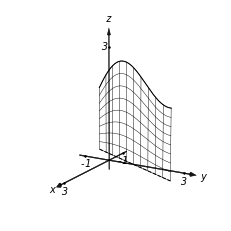

In [8]:
plotname = "fig_Vector_Calc_2b"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .95
ax.set_xlim(-1.25*scale, 3.25*scale)
ax.set_ylim(-1.25*scale, 3.25*scale)
ax.set_zlim(0*scale, 3.25*scale)

# axis arrows
arrow3d(ax, length=4.75, width=0.015, head=0.05, headwidth=4, offset=[-1.25,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=4.75, width=0.015, head=0.05, headwidth=4, offset=[0,-1.25,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=3.75, width=0.015, head=0.05, headwidth=4, offset=[0,0,-.25], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 30)
ax.axis("off")

tickpointsize = 2
ticksize=10
ticks = [-1, 3]
zoffset = -.2
for tick in ticks:
    ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
    ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
    ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick > 0:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, -.2, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(3.75, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 3.75, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 3.75, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-1, 4.5, N)
y = np.linspace(-1, 4, N)
X, Y = np.meshgrid(x, y)
f = lambda x, y: 2 + np.cos(y) + np.sin(x)

stride = 100
# ax.plot_wireframe(X, Y, f(X,Y), color="gray", ec="k", linewidth=.25, rstride=stride, cstride=stride)
# ax.plot_surface(X, Y, f(X,Y), color="gray", ec="k", alpha=.05, linewidth=.25, rstride=stride, cstride=stride)

x = np.linspace(-1, 1, N)
ax.plot(x, 2*x + 1, "--", c='k', linewidth=1)
ax.plot(x, 2*x + 1, f(x, 2*x + 1), c='k', linewidth=1)

for i in range(9):
        ax.plot(x, 2*x + 1, f(x, 2*x + 1)*i/8, c='k', linewidth=.45)

xs = np.linspace(-1, 1, 11)
for x in xs:
        ax.plot([x, x], [2*x + 1, 2*x + 1], [0, f(x, 2*x + 1)], c='k', linewidth=.45)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_3a

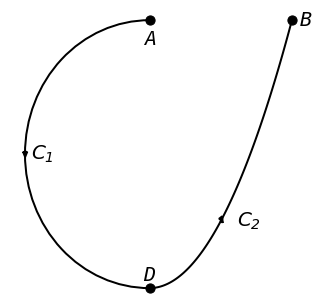

In [9]:
plotname = "fig_Vector_Calc_3a"

from matplotlib import patches

scale=1
fig = plt.figure(figsize=(4.35*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-1, 1.2)
ax.set_ylim(-.025, 1.05)
ax.axis("off")

# Plot
D = (0, 0)
A = (0, 1)
B = (1, 1)
dotsize = 85
ax.scatter(D[0], D[1], s=dotsize, c='k')
ax.scatter(A[0], A[1], s=dotsize, c='k')
ax.scatter(B[0], B[1], s=dotsize, c='k')

ax.text(D[0], D[1]+.05, s="D", fontsize=20, ha="center", va="center")
ax.text(A[0], A[1]-.07, s="A", fontsize=20, ha="center", va="center")
ax.text(B[0]+.1, B[1], s="B", fontsize=20, ha="center", va="center")
ax.text(-.75, .5, s="$C_1$", fontsize=20, ha="center", va="center")
ax.text(.7, .25, s="$C_2$", fontsize=20, ha="center", va="center")

ax.add_patch(patches.Arc((0, .5), 1.75, 1, theta1=90, theta2=270, linewidth=2, color="k"))

x = np.linspace(0, 1, 100)
ax.plot(x, x**2, c='k', linewidth=2)

ax.arrow(-.874, .51, 0, -.0005, head_width=.03, head_length=.02, overhang=.3, fc='k', ec='k', linewidth=2)
ax.arrow(0.5, .5**2, 0.0005, .00085, head_width=.03, head_length=.02, overhang=.3, fc='k', ec='k', linewidth=2)
# ax.annotate("", xy=(0.5, .5**2), xytext=(0.5 - 0.0005, .5**2-.0005), arrowprops=dict(arrowstyle="-|>", color="k", linewidth=2))

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_3b

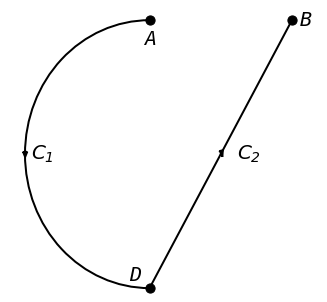

In [10]:
plotname = "fig_Vector_Calc_3b"

from matplotlib import patches

scale=1
fig = plt.figure(figsize=(4.35*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-1, 1.2)
ax.set_ylim(-.025, 1.05)
ax.axis("off")

# Plot
D = (0, 0)
A = (0, 1)
B = (1, 1)
dotsize = 85
ax.scatter(D[0], D[1], s=dotsize, c='k')
ax.scatter(A[0], A[1], s=dotsize, c='k')
ax.scatter(B[0], B[1], s=dotsize, c='k')

ax.text(D[0]-.1, D[1]+.05, s="D", fontsize=20, ha="center", va="center")
ax.text(A[0], A[1]-.07, s="A", fontsize=20, ha="center", va="center")
ax.text(B[0]+.1, B[1], s="B", fontsize=20, ha="center", va="center")
ax.text(-.75, .5, s="$C_1$", fontsize=20, ha="center", va="center")
ax.text(.7, .5, s="$C_2$", fontsize=20, ha="center", va="center")

ax.add_patch(patches.Arc((0, .5), 1.75, 1, theta1=90, theta2=270, linewidth=2, color="k"))

ax.plot([0, B[0]], [0, B[1]], c='k', linewidth=2)

ax.arrow(-.874, .51, 0, -.0005, head_width=.03, head_length=.02, overhang=.3, fc='k', ec='k', linewidth=2)
ax.arrow(0.5, .5, 0.0005, .0005, head_width=.03, head_length=.02, overhang=.3, fc='k', ec='k', linewidth=2)
# ax.annotate("", xy=(0.5, .5**2), xytext=(0.5 - 0.0005, .5**2-.0005), arrowprops=dict(arrowstyle="-|>", color="k", linewidth=2))

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_4

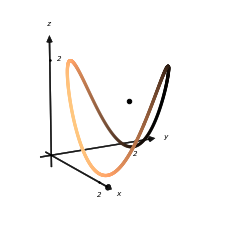

In [11]:
plotname = "fig_Vector_Calc_4"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .9
ax.set_xlim(-.25*scale, 2.5*scale)
ax.set_ylim(-.25*scale, 2.5*scale)
ax.set_zlim(-.25*scale, 2.5*scale)

# axis arrows
arrow3d(ax, length=2.75, width=0.015, head=0.05, headwidth=4, offset=[-.25,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2.75, width=0.015, head=0.05, headwidth=4, offset=[0,-.25,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=2.75, width=0.015, head=0.05, headwidth=4, offset=[0,0,-.25], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, -30)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [2]
zoffset = -.25
for tick in ticks:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(.4, 0, tick + .1, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(2.75, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 2.75, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 2.75, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
t = np.linspace(0, 2*np.pi, 1000)
ax.scatter(np.cos(t) + 1, np.sin(t) + 1, np.sin(2*t) + 1, s=5, c=-np.sin(t), cmap="copper", linewidth=1)

ax.scatter(1, 1.25, 1.20, s=20, c='k')

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_5a

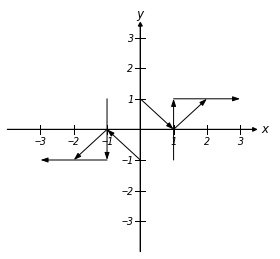

In [12]:
plotname = "fig_Vector_Calc_5a"

scale=.85
fig = plt.figure(figsize=(4.35*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-3, -2, -1, 1, 2, 3])
ax.set_yticks([-3, -2, -1, 1, 2, 3])

headscale=.25
ax.arrow(-4, 0, 7.5, 0, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -4, 0, 7.5, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .3
ticks = [-3, -2, -1, 1, 2, 3]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(3.75, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 3.75, s="y", fontsize=12, ha="center", va="center")

# Plot
prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.6", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(0, 1), xy=(1, 0), arrowprops=prop)
ax.annotate("", xytext=(1, -1), xy=(1, 1), arrowprops=prop)
ax.annotate("", xytext=(1, 0), xy=(2, 1), arrowprops=prop)
ax.annotate("", xytext=(1, 1), xy=(3, 1), arrowprops=prop)

ax.annotate("", xytext=(-1, 1), xy=(-1, -1), arrowprops=prop)
ax.annotate("", xytext=(0, -1), xy=(-1, 0), arrowprops=prop)
ax.annotate("", xytext=(-1, 0), xy=(-2, -1), arrowprops=prop)
ax.annotate("", xytext=(-1, -1), xy=(-3, -1), arrowprops=prop)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_5b

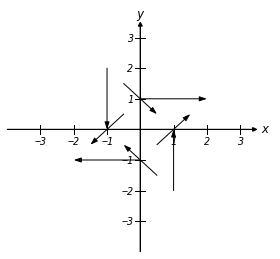

In [13]:
plotname = "fig_Vector_Calc_5b"

scale=.85
fig = plt.figure(figsize=(4.35*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-3, -2, -1, 1, 2, 3])
ax.set_yticks([-3, -2, -1, 1, 2, 3])

headscale=.25
ax.arrow(-4, 0, 7.5, 0, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -4, 0, 7.5, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .3
ticks = [-3, -2, -1, 1, 2, 3]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(3.75, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 3.75, s="y", fontsize=12, ha="center", va="center")

# Plot
prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.6", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(1, -2), xy=(1, 0), arrowprops=prop)
ax.annotate("", xytext=(0, 1), xy=(2, 1), arrowprops=prop)
ax.annotate("", xytext=(-1, 2), xy=(-1, 0), arrowprops=prop)
ax.annotate("", xytext=(0, -1), xy=(-2, -1), arrowprops=prop)

ax.annotate("", xytext=(.5, -.5), xy=(1.5, .5), arrowprops=prop)
ax.annotate("", xytext=(-.5, 1.5), xy=(.5, .5), arrowprops=prop)
ax.annotate("", xytext=(-.5, .5), xy=(-1.5, -.5), arrowprops=prop)
ax.annotate("", xytext=(.5, -1.5), xy=(-.5, -.5), arrowprops=prop)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_5c

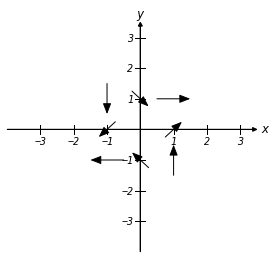

In [14]:
plotname = "fig_Vector_Calc_5c"

scale=.85
fig = plt.figure(figsize=(4.35*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-3, -2, -1, 1, 2, 3])
ax.set_yticks([-3, -2, -1, 1, 2, 3])

headscale=.25
ax.arrow(-4, 0, 7.5, 0, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -4, 0, 7.5, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .3
ticks = [-3, -2, -1, 1, 2, 3]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(3.75, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 3.75, s="y", fontsize=12, ha="center", va="center")

# Plot
prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(.5, 1), xy=(1.5, 1), arrowprops=prop)
ax.annotate("", xytext=(1, -1.5), xy=(1, -.5), arrowprops=prop)
ax.annotate("", xytext=(-.5, -1), xy=(-1.5, -1), arrowprops=prop)
ax.annotate("", xytext=(-1, 1.5), xy=(-1, .5), arrowprops=prop)

ax.annotate("", xytext=(.25, -1.25), xy=(-.25, -.75), arrowprops=prop)
ax.annotate("", xytext=(-.75, .25), xy=(-1.25, -.25), arrowprops=prop)
ax.annotate("", xytext=(-.25, 1.25), xy=(.25, .75), arrowprops=prop)
ax.annotate("", xytext=(.75, -.25), xy=(1.25, .25), arrowprops=prop)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_5d

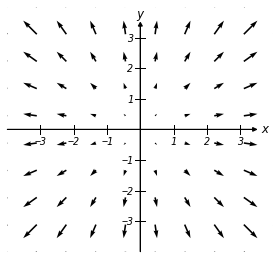

In [15]:
plotname = "fig_Vector_Calc_5d"

scale=.85
fig = plt.figure(figsize=(4.35*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-3, -2, -1, 1, 2, 3])
ax.set_yticks([-3, -2, -1, 1, 2, 3])

headscale=.25
ax.arrow(-4, 0, 7.5, 0, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -4, 0, 7.5, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .3
ticks = [-3, -2, -1, 1, 2, 3]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(3.75, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 3.75, s="y", fontsize=12, ha="center", va="center")

# Plot
def fx(x, y):
    return x

def fy(x, y):
    return y

N = 10
x = np.linspace(-4, 4, N)
y = np.linspace(-4, 4, N)
X, Y = np.meshgrid(x, y)

Fx = fx(X, Y) / np.max(fx(X, Y))
Fy = fy(X, Y) / np.max(fy(X, Y))
ax.quiver(X, Y, Fx, Fy, color='k', linewidth=1, zorder=0)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_6a

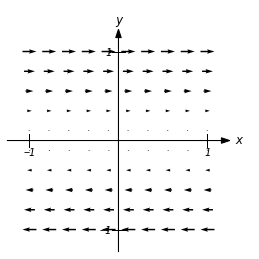

In [16]:
plotname = "fig_Vector_Calc_6a"

scale=.85
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-1.25, 1.5)
ax.set_ylim(-1.25, 1.5)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1])

headscale=.125
ax.arrow(-1.25, 0, 2.5, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -1.25, 0, 2.5, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .15
ticks = [-1, 1]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(1.35, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.35, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 10
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, Y, 0, scale=17.5, color='k', linewidth=.5, zorder=0, pivot="mid")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_6b

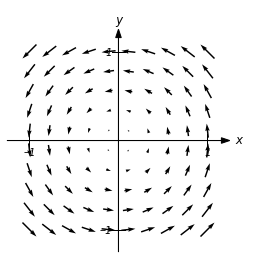

In [3]:
plotname = "fig_Vector_Calc_6b"

scale=.85
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-1.25, 1.5)
ax.set_ylim(-1.25, 1.5)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1])

headscale=.125
ax.arrow(-1.25, 0, 2.5, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -1.25, 0, 2.5, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .15
ticks = [-1, 1]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(1.35, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.35, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 10
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, -Y, X, scale=17.5, color='k', linewidth=.5, zorder=0, pivot="mid")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_6c

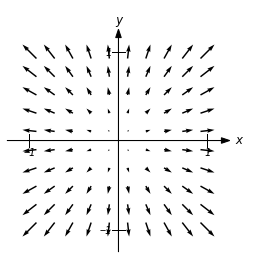

In [18]:
plotname = "fig_Vector_Calc_6c"

scale=.85
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-1.25, 1.5)
ax.set_ylim(-1.25, 1.5)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1])

headscale=.125
ax.arrow(-1.25, 0, 2.5, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -1.25, 0, 2.5, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .15
ticks = [-1, 1]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(1.35, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.35, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 10
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, X, Y, scale=17.5, color='k', linewidth=.5, zorder=0, pivot="mid")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_6d

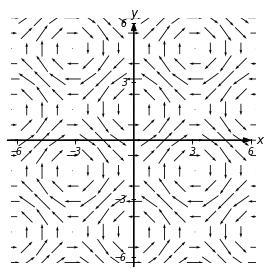

In [19]:
plotname = "fig_Vector_Calc_6d"

scale=.85
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-2*np.pi, 2*np.pi)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-6, -3, 3, 6])
ax.set_yticks([-6, -3, 3, 6])

headscale=.5
ax.arrow(-6.5, 0, 12.5, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -6.5, 0, 12.5, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .15
ticks = [-6, -3, 3, 6]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(6.5, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 6.5, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 17
x = np.linspace(-2*np.pi, 2*np.pi, N)
y = np.linspace(-2*np.pi, 2*np.pi, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, np.cos(Y), np.sin(X), scale=15, color='k', linewidth=1, zorder=0, pivot="mid")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_7

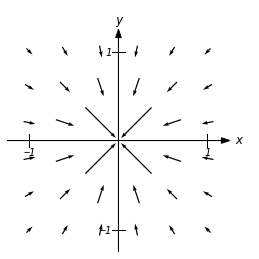

In [20]:
plotname = "fig_Vector_Calc_7"

scale=.85
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-1.25, 1.5)
ax.set_ylim(-1.25, 1.5)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1])

headscale=.125
ax.arrow(-1.25, 0, 2.5, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -1.25, 0, 2.5, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0, fc='k', ec='k', linewidth=1, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .15
ticks = [-1, 1]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(1.35, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.35, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 6
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, -X/(X**2 + Y**2)**(2/2), -Y/(X**2 + Y**2)**(2/2), scale=20, color='k', width=.005, zorder=0, pivot="mid")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_8

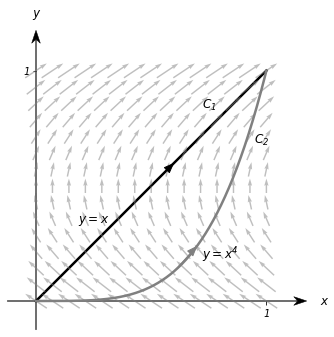

In [21]:
plotname = "fig_Vector_Calc_8"

scale=1
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-.125, 1.125)
ax.set_ylim(-.125, 1.125)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([1])
ax.set_yticks([1])

headscale=.075
ax.arrow(-.125, 0, 1.3, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -.125, 0, 1.3, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)

ax.text(1.25, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.25, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 15
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, 3*(Y-1/2), 1, scale=20, color="gray", width=.005, zorder=2, pivot="mid", alpha=.5)

ax.plot([0, 1], [0, 1], c='k', linewidth=2.5, zorder=0)
x = np.linspace(0, 1, 1000)
ax.plot(x, x**4, c="gray", linewidth=2.5, zorder=0)

ax.text(.25, .35, s="$y=x$", fontsize=12, ha="center", va="center")
ax.text(.8, .2, s="$y=x^4$", fontsize=12, ha="center", va="center")
ax.text(.98, .7, s="$C_2$", fontsize=12, ha="center", va="center")
ax.text(.75, .85, s="$C_1$", fontsize=12, ha="center", va="center")

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(.5, .5), xy=(.6, .6), arrowprops=prop)

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color="gray")
ax.annotate("", xytext=(.6, .6**4), xy=(.6+.1, (.6+.1)**4), arrowprops=prop)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_9

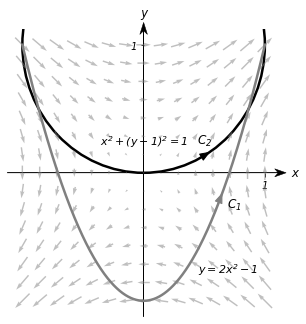

In [22]:
plotname = "fig_Vector_Calc_9"

from matplotlib import patches

scale=1
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-1.125, 1.25)
ax.set_ylim(-1.125, 1.125)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([1])
ax.set_yticks([1])

headscale=.125
ax.arrow(-1.125, 0, 2.3, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -1.125, 0, 2.3, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)

ax.text(1.25, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.25, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 15
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, Y, X, scale=20, color="gray", width=.005, zorder=2, pivot="mid", alpha=.5)

x = np.linspace(-1, 1, 1000)
ax.plot(x, 2*x**2 - 1, c="gray", linewidth=2.5, zorder=0)
ax.add_patch(patches.Circle((0, 1), radius=1, fill=False, color='k', linewidth=2.5, zorder=0))

f = lambda x : 1 - np.sqrt(1 - x**2)
a = .45
prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(a, f(a)), xy=(a+.1, f(a+.1)), arrowprops=prop)

f = lambda x : 2*x**2 - 1
a = .55
prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color="gray")
ax.annotate("", xytext=(a, f(a)), xy=(a+.1, f(a+.1)), arrowprops=prop)

ax.text(0, .25, s="$x^2 + (y-1)^2 = 1$", fontsize=11, ha="center", va="center")
ax.text(.7, -.75, s="$y = 2x^2 - 1$", fontsize=11, ha="center", va="center")

ax.text(.75, -.25, s="$C_1$", fontsize=12, ha="center", va="center")
ax.text(.5, .25, s="$C_2$", fontsize=12, ha="center", va="center")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_10

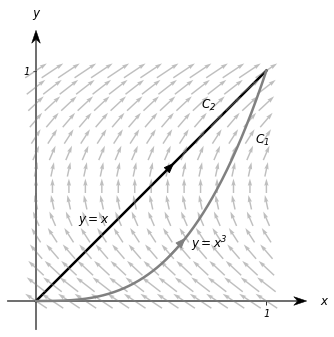

In [23]:
plotname = "fig_Vector_Calc_10"

scale=1
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-.125, 1.125)
ax.set_ylim(-.125, 1.125)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([1])
ax.set_yticks([1])

headscale=.075
ax.arrow(-.125, 0, 1.3, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -.125, 0, 1.3, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)

ax.text(1.25, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.25, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 15
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, 3*(Y-1/2), 1, scale=20, color="gray", width=.005, zorder=2, pivot="mid", alpha=.5)

ax.plot([0, 1], [0, 1], c='k', linewidth=2.5, zorder=0)
x = np.linspace(0, 1, 1000)
ax.plot(x, x**3, c="gray", linewidth=2.5, zorder=0)

ax.text(.25, .35, s="$y=x$", fontsize=12, ha="center", va="center")
ax.text(.75, .25, s="$y=x^3$", fontsize=12, ha="center", va="center")
ax.text(.98, .7, s="$C_1$", fontsize=12, ha="center", va="center")
ax.text(.75, .85, s="$C_2$", fontsize=12, ha="center", va="center")

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(.5, .5), xy=(.6, .6), arrowprops=prop)

a = .55
prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color="gray")
ax.annotate("", xytext=(a, a**3), xy=(a+.1, (a+.1)**3), arrowprops=prop)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_12

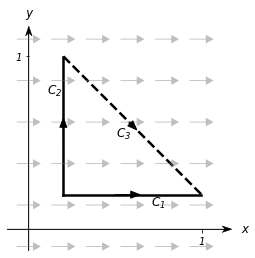

In [105]:
plotname = "fig_Vector_Calc_12"

scale=3/4
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-.125, 1.125)
ax.set_ylim(-.125, 1.125)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([1])
ax.set_yticks([1])

headscale=.075
ax.arrow(-.125, 0, 1.3, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -.125, 0, 1.3, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)

ax.text(1.25, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.25, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 6
x = np.linspace(0, 1, N)
y = np.linspace(-.1, 1.1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, 1, 0, scale=9, color="gray", width=.004, headwidth=10, headlength=9, headaxislength=9, zorder=2, pivot="mid", alpha=.5)

ax.plot([.2, .995], [.2, .2], c='k', linewidth=2.5, zorder=0)
ax.plot([.2, .2], [.2, .997], c='k', linewidth=2.5, zorder=0)
ax.plot([.2, 1], [1, .2], "--", c='k', linewidth=2.5, zorder=0)

ax.text(.75, .15, s="$C_1$", fontsize=12, ha="center", va="center")
ax.text(.15, .8, s="$C_2$", fontsize=12, ha="center", va="center")
ax.text(.55, .55, s="$C_3$", fontsize=12, ha="center", va="center")

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(.5, .2), xy=(.65, .2), arrowprops=prop)

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(.2, .5), xy=(.2, .65), arrowprops=prop)

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(.6, .6), xy=(.63, .57), arrowprops=prop)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_13a

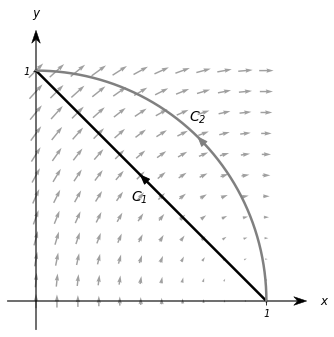

In [137]:
plotname = "fig_Vector_Calc_13a"

scale=1
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-.125, 1.125)
ax.set_ylim(-.125, 1.125)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([1])
ax.set_yticks([1])

headscale=.075
ax.arrow(-.125, 0, 1.3, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -.125, 0, 1.3, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)

ax.text(1.25, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.25, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 12
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, Y, -X + 1, scale=20, color="gray", width=.005, zorder=0, pivot="mid", alpha=.75)

ax.plot([1, 0], [0, 1], c='k', linewidth=2.5, zorder=1)
t = np.linspace(0, np.pi/2, 1000)
ax.plot(np.cos(t), np.sin(t), c="gray", linewidth=2.5, zorder=1)

ax.text(.45, .45, s="$C_1$", fontsize=14, ha="center", va="center", zorder=1)
ax.text(.7, .8, s="$C_2$", fontsize=14, ha="center", va="center", zorder=1)

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(.6, .4), xy=(.45, .55), arrowprops=prop)

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color="gray")
ax.annotate("", xytext=(.75, .66), xy=(.7, .715), arrowprops=prop)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_13b

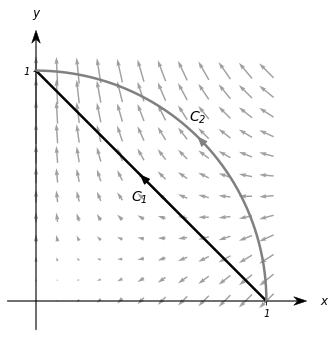

In [141]:
plotname = "fig_Vector_Calc_13b"

scale=1
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-.125, 1.125)
ax.set_ylim(-.125, 1.125)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([1])
ax.set_yticks([1])

headscale=.075
ax.arrow(-.125, 0, 1.3, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -.125, 0, 1.3, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)

ax.text(1.25, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.25, s="y", fontsize=12, ha="center", va="center")

# Plot
N = 12
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, -X, 2*Y-X, scale=20, color="gray", width=.005, zorder=0, pivot="mid", alpha=.75)

ax.plot([1, 0], [0, 1], c='k', linewidth=2.5, zorder=1)
t = np.linspace(0, np.pi/2, 1000)
ax.plot(np.cos(t), np.sin(t), c="gray", linewidth=2.5, zorder=1)

ax.text(.45, .45, s="$C_1$", fontsize=14, ha="center", va="center", zorder=1)
ax.text(.7, .8, s="$C_2$", fontsize=14, ha="center", va="center", zorder=1)

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(.6, .4), xy=(.45, .55), arrowprops=prop)

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color="gray")
ax.annotate("", xytext=(.75, .66), xy=(.7, .715), arrowprops=prop)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_14

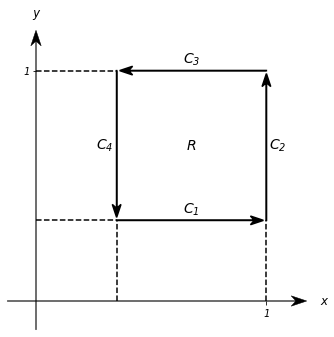

In [187]:
plotname = "fig_Vector_Calc_14"

scale=1
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-.125, 1.125)
ax.set_ylim(-.125, 1.125)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([1])
ax.set_yticks([1])

headscale=.09
ax.arrow(-.125, 0, 1.3, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -.125, 0, 1.3, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.5, length_includes_head= True, clip_on = False, zorder=0)

ax.text(1.25, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1.25, s="y", fontsize=12, ha="center", va="center")

# Plot
a = .35
b = 1
c = .35
d = 1

ax.text((a+b)/2, .4, s="$C_1$", fontsize=14, ha="center", va="center", zorder=1)
ax.text(b+.05, (c+d)/2, s="$C_2$", fontsize=14, ha="center", va="center", zorder=1)
ax.text((a+b)/2, 1.05, s="$C_3$", fontsize=14, ha="center", va="center", zorder=1)
ax.text(0.3, (c+d)/2, s="$C_4$", fontsize=14, ha="center", va="center", zorder=1)
ax.text((a+b)/2, (c+d)/2, s="$R$", fontsize=14, ha="center", va="center", zorder=1)

lw=1.5
headscale=.075
ax.arrow(a, c, (b-a)*.98, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=lw, length_includes_head= True, zorder=0)
ax.arrow(b, c, 0, (d-c)*.98, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=lw, length_includes_head= True, zorder=0)
ax.arrow(b, d, -(b-a)*.98, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=lw, length_includes_head= True, zorder=0)
ax.arrow(a, d, 0, -(d-c)*.98, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=lw, length_includes_head= True, zorder=0)

ax.plot([0, a], [c, c], "--", c='k', linewidth=lw, zorder=1)
ax.plot([0, a], [d, d], "--", c='k', linewidth=lw, zorder=1)
ax.plot([a, a], [0, c], "--", c='k', linewidth=lw, zorder=1)
ax.plot([b, b], [0, c], "--", c='k', linewidth=lw, zorder=1)
fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_15

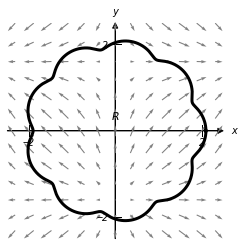

In [12]:
plotname = "fig_Vector_Calc_15"

scale=.75
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-2, 2])
ax.set_yticks([-2, 2])

headscale=.25
ax.arrow(-2.5, 0, 5, 0, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=.8, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -2.5, 0, 5, head_width=0.5*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=.8, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .25
ticks = [-2, 2]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(2.75, 0, s="x", fontsize=10, ha="center", va="center")
ax.text(0, 2.75, s="y", fontsize=10, ha="center", va="center")

# Plot
t = np.linspace(0, 2*np.pi, 1000)
ax.plot(2*np.cos(t) + np.cos(10*t)/10, 2*np.sin(t) + np.sin(10*t)/10, c='k', linewidth=3, clip_on=False, zorder=3)

ax.text(0, .35, s="$R$", fontsize=11, ha="center", va="center", zorder=2)

N = 13
x = np.linspace(-2.4, 2.4, N)
y = np.linspace(-2.4, 2.4, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, np.sin(X), np.cos(Y), scale=20, color="gray", width=.005, zorder=1, pivot="mid", alpha=1)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_16

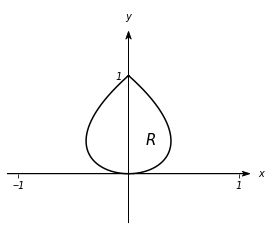

In [32]:
plotname = "fig_Vector_Calc_16"

scale=.75
fig = plt.figure(figsize=(4.8*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-1.1, 1.25)
ax.set_ylim(-.5, 1.7)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-1, 1])
ax.set_yticks([1])

xheadscale=.1
yheadscale=.1
ax.arrow(-1.1, 0, 2.2, 0, head_width=0.5*xheadscale, head_length=0.7*xheadscale, overhang=0.3, fc='k', ec='k', linewidth=.8, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -.5, 0, 1.95, head_width=0.5*yheadscale, head_length=0.8*yheadscale, overhang=0.3, fc='k', ec='k', linewidth=.8, length_includes_head= True, clip_on = False, zorder=0)

# ticklenght = .25
# ticks = [-2, 2]
# for tick in ticks:
#     ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
#     ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(1.2, 0, s="x", fontsize=10, ha="center", va="center")
ax.text(0, 1.6, s="y", fontsize=10, ha="center", va="center")

# Plot
t = np.linspace(-1, 1, 1000)
ax.plot(t - t**3, t**2, c='k', linewidth=1.5, clip_on=False, zorder=3)

ax.text(.2, .35, s="$R$", fontsize=15, ha="center", va="center", zorder=2)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_17

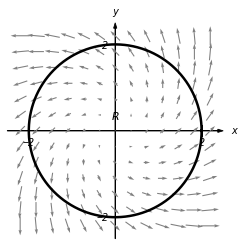

In [41]:
plotname = "fig_Vector_Calc_17"

scale=.75
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([-2, 2])
ax.set_yticks([-2, 2])

headscale=.25
ax.arrow(-2.5, 0, 5, 0, head_width=0.3*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=.8, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -2.5, 0, 5, head_width=0.3*headscale, head_length=0.5*headscale, overhang=0, fc='k', ec='k', linewidth=.8, length_includes_head= True, clip_on = False, zorder=0)

ticklenght = .25
ticks = [-2, 2]
for tick in ticks:
    ax.plot([tick, tick], [-ticklenght/2, ticklenght/2], c='k', linewidth=1, clip_on=False, zorder=0)
    ax.plot([-ticklenght/2, ticklenght/2], [tick, tick], c='k', linewidth=1, clip_on=False, zorder=0)

ax.text(2.75, 0, s="x", fontsize=10, ha="center", va="center")
ax.text(0, 2.75, s="y", fontsize=10, ha="center", va="center")

# Plot
t = np.linspace(0, 2*np.pi, 1000)
ax.plot(2*np.cos(t), 2*np.sin(t), c='k', linewidth=2.5, clip_on=False, zorder=3)

ax.text(0, .35, s="$R$", fontsize=11, ha="center", va="center", zorder=2)

N = 13
x = np.linspace(-2.2, 2.2, N)
y = np.linspace(-2.2, 2.2, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, X-Y, X + Y, scale=50, color="gray", width=.005, zorder=1, pivot="mid", alpha=1)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_18

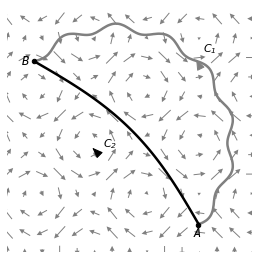

In [153]:
plotname = "fig_Vector_Calc_18"

from matplotlib import patches

scale=.85
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-1.5*np.pi, 3*np.pi)
ax.set_ylim(-1.5*np.pi, 3*np.pi)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.axis("off")

# Plot
N = 15
x = np.linspace(-1.5*np.pi, 3*np.pi, N)
y = np.linspace(-1.5*np.pi, 3.5*np.pi, N)
X, Y = np.meshgrid(x, y)

ax.quiver(X, Y, np.cos(Y), np.sin(X), scale=20, color="gray", headwidth=5, headlength=5, headaxislength=5, linewidth=.5, zorder=0, pivot="mid")
B = (-np.pi, 2*np.pi)
A = (2*np.pi, -np.pi)
ax.scatter(A[0], A[1], s=20, c="k", zorder=4)
ax.scatter(B[0], B[1], s=20, c="k", zorder=4)

# ax.add_patch(patches.Ellipse((np.pi/2, np.pi/2), np.pi*np.sqrt(18), np.pi*np.sqrt(18)))

theta1 = -45
theta2 = 135
t = np.linspace(theta1*np.pi/180, theta2*np.pi/180, 1000)
r = np.sqrt(18)*np.pi/2

import matplotlib as mpl
with mpl.rc_context({'path.sketch': (4, 51, 1)}):
    ax.plot(r*np.cos(t) + np.pi/2, r*np.sin(t) + np.pi/2, c="gray", linewidth=2.5, clip_on=False, zorder=3)

with mpl.rc_context({'path.sketch': (-20, 470, 1)}):
    ax.plot([-np.pi, 2*np.pi], [2*np.pi, -np.pi], c='k', linewidth=2.5, clip_on=False, zorder=3)

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color='k')
ax.annotate("", xytext=(.3, 1.2), xy=(.2, 1.3), arrowprops=prop)

prop = dict(arrowstyle="-|>,head_width=0.35,head_length=0.9", shrinkA=0, shrinkB=0, color="gray")
ax.annotate("", xytext=(6.4, 6), xy=(6.2, 6.4), arrowprops=prop)

ax.text(7, 7, s="$C_1$", fontsize=11, ha="center", va="center", zorder=5)
ax.text(1.25, 1.5, s="$C_2$", fontsize=11, ha="center", va="center", zorder=5)
ax.text(A[0], A[1]-.5, s="A", fontsize=12, ha="center", va="center", zorder=5)
ax.text(B[0]-.5, B[1], s="B", fontsize=12, ha="center", va="center", zorder=5)
fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_20

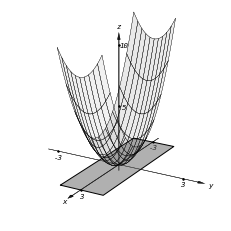

In [198]:
plotname = "fig_Vector_Calc_20"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .85
ax.set_xlim(-3*scale, 3*scale)
ax.set_ylim(-3*scale, 3*scale)
ax.set_zlim(-.5*scale, 11*scale)

# axis arrows
arrow3d(ax, length=7.5, width=0.015, head=0.04, headwidth=5, offset=[-3.5,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=7.5, width=0.015, head=0.04, headwidth=5, offset=[0,-3.5,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=11.5, width=0.015, head=0.05, headwidth=4, offset=[0,0,-.5], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(20, 30)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [-3, 3, 5, 10]
zoffset = -.5
for tick in ticks:
    if tick < 5:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    else:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(4.25, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 4.25, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 11.5, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-3, 3, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
f = lambda x, y: x**2 + 2*y**2

stride = 100
ax.plot_wireframe(X, Y, f(X,Y), color="gray", ec="k", linewidth=.25, rstride=stride, cstride=stride)
ax.plot_surface(X, Y, f(X,Y), color="gray", ec="k", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)
ax.plot_surface(X, Y, 0*X, color="gray", ec="k", alpha=.5, linewidth=1, rstride=N, cstride=N, zorder=-2)
fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_21

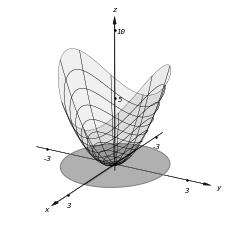

In [214]:
plotname = "fig_Vector_Calc_21"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .7
ax.set_xlim(-3*scale, 3*scale)
ax.set_ylim(-3*scale, 3.5*scale)
ax.set_zlim(-.5*scale, 12*scale)

# axis arrows
arrow3d(ax, length=7.5, width=0.015, head=0.04, headwidth=5, offset=[-3.5,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=7.5, width=0.015, head=0.04, headwidth=5, offset=[0,-3.5,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=11.5, width=0.015, head=0.05, headwidth=4, offset=[0,0,-.5], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(20, 30)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [-3, 3, 5, 10]
zoffset = -.75
for tick in ticks:
    if tick < 5:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    else:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(4.25, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 4.25, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 11.5, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
t = np.linspace(0, 2*np.pi, N)
r = np.linspace(0, 2, N)
T, R = np.meshgrid(t, r)
f = lambda x, y: x**2 + 2*y**2

stride = 100
ax.plot_surface(R*np.cos(T), R*np.sin(T), f(R*np.cos(T), R*np.sin(T)), color="gray", ec="k", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)
ax.plot_surface(R*np.cos(T), R*np.sin(T), 0*T, color="gray", ec="gray", alpha=.5, linewidth=1, rstride=N, cstride=N, zorder=-2)
fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_22a

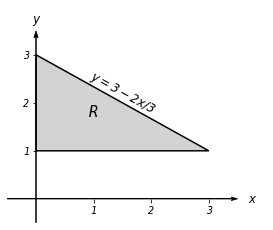

In [249]:
plotname = "fig_Vector_Calc_22a"

from matplotlib import patches

scale=.75
fig = plt.figure(figsize=(4.8*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-.5, 4)
ax.set_ylim(-.5, 4)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([1, 2, 3])
ax.set_yticks([1, 2, 3])

headscale=.15
ax.arrow(-.5, 0, 4, 0, head_width=0.5*headscale, head_length=0.75*headscale, overhang=0.3, fc='k', ec='k', linewidth=.75, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -.5, 0, 4, head_width=0.5*headscale, head_length=1*headscale, overhang=0.3, fc='k', ec='k', linewidth=.75, length_includes_head= True, clip_on = False, zorder=0)

ax.text(3.75, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 3.75, s="y", fontsize=12, ha="center", va="center")

# Plot
ax.add_patch(patches.Polygon([(0, 1), (0, 3), (3, 1)], closed=True, fill=True, color='lightgray', ec="k", alpha=1, linewidth=1.5, zorder=-2))
ax.text(1, 1.8, s="R", fontsize=15, ha="center", va="center")

ax.text(1.5, 2.2, s="$y=3-2x/3$", rotation = -29, fontsize=12, ha="center", va="center")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_22b

In [250]:
plotname = "fig_Vector_Calc_22b"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .7
ax.set_xlim(-3*scale, 3*scale)
ax.set_ylim(-3*scale, 3.5*scale)
ax.set_zlim(-.5*scale, 12*scale)

# axis arrows
arrow3d(ax, length=7.5, width=0.015, head=0.04, headwidth=5, offset=[-3.5,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=7.5, width=0.015, head=0.04, headwidth=5, offset=[0,-3.5,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=11.5, width=0.015, head=0.05, headwidth=4, offset=[0,0,-.5], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(20, 30)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [-3, 3, 5, 10]
zoffset = -.75
for tick in ticks:
    if tick < 5:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    else:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(4.25, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 4.25, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 11.5, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(0, 3, N)
y = np.linspace(1, 3, N)

f = lambda x, y: x**2 + 2*y**2

stride = 100
ax.plot_surface(R*np.cos(T), R*np.sin(T), f(R*np.cos(T), R*np.sin(T)), color="gray", ec="k", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)
ax.plot_surface(R*np.cos(T), R*np.sin(T), 0*T, color="gray", ec="gray", alpha=.5, linewidth=1, rstride=N, cstride=N, zorder=-2)
fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

: 

: 

### fig_Vector_Calc_23

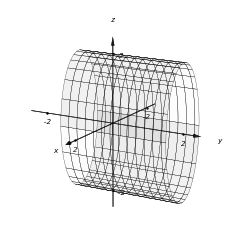

In [23]:
plotname = "fig_Vector_Calc_23"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .7
ax.set_xlim(-2.5*scale, 2.5*scale)
ax.set_ylim(-2*scale, 2.5*scale)
ax.set_zlim(-2*scale, 3*scale)

# axis arrows
arrow3d(ax, length=5, width=0.01, head=0.04, headwidth=5, offset=[-2.5,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=5, width=0.01, head=0.04, headwidth=5, offset=[0,-2.5,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=5, width=0.01, head=0.05, headwidth=4, offset=[0,0,-2.5], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 30)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [-2, 2]
zoffset = -.25
for tick in ticks:
    ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
    ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
    ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
    ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(3, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 3, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 3, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 2, N)
X, Y = np.meshgrid(x, y)

stride = 80
ax.plot_surface(X, Y, 2*np.sqrt(1-X**2), color="white", ec="k", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)
ax.plot_surface(X, Y, -2*np.sqrt(1-X**2), color="white", ec="k", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)


fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_24a

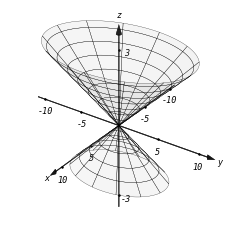

In [53]:
plotname = "fig_Vector_Calc_24a"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .55
ax.set_xlim(-12*scale, 12*scale)
ax.set_ylim(-12*scale, 12*scale)
ax.set_zlim(-3*scale, 5*scale)

# axis arrows
arrow3d(ax, length=23, width=0.02, head=0.04, headwidth=5, offset=[-11,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=23, width=0.02, head=0.04, headwidth=5, offset=[0,-11,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=7.5, width=0.05, head=0.05, headwidth=6, offset=[0,0,-3.5], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(30, 35)
ax.axis("off")

tickpointsize = 2
ticksize=8.5
ticks = [-10, -5, -3, 3, 5, 10]
zoffset = -.5
for tick in ticks:
    if np.abs(tick) > 3:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    else:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, 1, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(12.5, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 12.5, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 4.35, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
u = np.linspace(0, 2*np.pi, N)
v = np.linspace(-2, 3, N)
U, V = np.meshgrid(u, v)

stride = 80
ax.plot_surface(2*V*np.cos(U), 3*V*np.sin(U), V, color="white", ec="k", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)


fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_24b

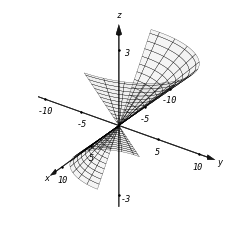

In [57]:
plotname = "fig_Vector_Calc_24b"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .55
ax.set_xlim(-12*scale, 12*scale)
ax.set_ylim(-12*scale, 12*scale)
ax.set_zlim(-3*scale, 5*scale)

# axis arrows
arrow3d(ax, length=23, width=0.02, head=0.04, headwidth=5, offset=[-11,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=23, width=0.02, head=0.04, headwidth=5, offset=[0,-11,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=7.5, width=0.05, head=0.05, headwidth=6, offset=[0,0,-3.5], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(30, 35)
ax.axis("off")

tickpointsize = 2
ticksize=8.5
ticks = [-10, -5, -3, 3, 5, 10]
zoffset = -.5
for tick in ticks:
    if np.abs(tick) > 3:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    else:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, 1, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(12.5, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 12.5, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 4.35, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000

stride = 80

u = np.linspace(0, np.pi, N)
v = np.linspace(0, 3, N)
U, V = np.meshgrid(u, v)
ax.plot_surface(2*V*np.cos(U), 3*V*np.sin(U), V, color="white", ec="k", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)

u = np.linspace(np.pi, 0, N)
v = np.linspace(-2, 0, N)
U, V = np.meshgrid(u, v)
ax.plot_surface(2*V*np.cos(U), 3*V*np.sin(U), V, color="white", ec="k", alpha=.1, linewidth=.25, rstride=stride, cstride=stride)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_25a

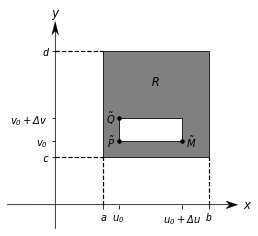

In [129]:
plotname = "fig_Vector_Calc_25a"

from matplotlib import patches

scale=.75
fig = plt.figure(figsize=(4*scale, 4*scale))
ax = fig.add_axes([0, 0, 1, 1])

# Opmaak
ax.set_xlim(-.125, 1)
ax.set_ylim(-.125, 1)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax.spines[direction].set_position('zero')

ax.set_xticks([])
ax.set_yticks([])

xheadscale=.08
yheadscale=.07

ax.arrow(-.25, 0, 1.2, 0, head_width=0.5*xheadscale, head_length=0.75*xheadscale, overhang=0.3, fc='k', ec='k', linewidth=.35, length_includes_head= True, clip_on = False, zorder=0)
ax.arrow(0, -.125, 0, 1.08, head_width=0.5*yheadscale, head_length=1*yheadscale, overhang=0.3, fc='k', ec='k', linewidth=.35, length_includes_head= True, clip_on = False, zorder=0)

ax.text(1, 0, s="x", fontsize=12, ha="center", va="center")
ax.text(0, 1, s="y", fontsize=12, ha="center", va="center")

# Plot
a = .25
b = .8
u0 = .33
u0du = .66
ax.set_xticks([a, u0, u0du, b])
ax.set_xticklabels(['a', "$u_0$", r"$u_0 + \Delta u$", 'b'])

c = .25
d = .8
v0 = .33
v0dv = .45
ax.set_yticks([c, v0, v0dv, d])
ax.set_yticklabels(['c', "$v_0$", r"$v_0 + \Delta v$", 'd'])

ax.add_patch(patches.Rectangle((a, c), b-a, d-c, fill=True, color="gray", ec="k", linewidth=.8, clip_on = False, zorder=0))
ax.add_patch(patches.Rectangle((u0, v0), u0du-u0, v0dv-v0, fill=True, color="white", ec="k", linewidth=.8, clip_on = False, zorder=0))

ax.scatter(u0, v0, s=12, c="k", zorder=1)
ax.scatter(u0du, u0, s=12, c="k", zorder=1)
ax.scatter(u0, v0dv, s=12, c="k", zorder=1)

ax.plot([a, a], [0, c], "--", c="k", linewidth=1.2, clip_on = False, zorder=0)
ax.plot([0, a], [c, c], "--", c="k", linewidth=1.2, clip_on = False, zorder=0)

ax.plot([b, b], [0, c], "--", c="k", linewidth=1.2, clip_on = False, zorder=0)
ax.plot([0, a], [d, d], "--", c="k", linewidth=1.2, clip_on = False, zorder=0)

ax.text((a+b)/2, 0.8*d, s="R", fontsize=12, ha="center", va="center")
ax.text((u0+a)/2, v0dv, s=r"$\tilde{Q}$", fontsize=10, ha="center", va="center")
ax.text((u0+a)/2, v0, s=r"$\tilde{P}$", fontsize=10, ha="center", va="center")
ax.text((u0du+b)/2 - .02, v0, s=r"$\tilde{M}$", fontsize=10, ha="center", va="center")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_25b

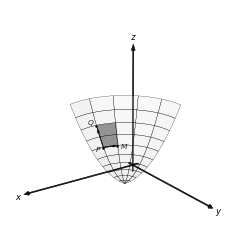

In [266]:
plotname = "fig_Vector_Calc_25b"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limitsz1
scale = .85
ax.set_xlim(0*scale, 2*scale)
ax.set_ylim(0*scale, 2*scale)
ax.set_zlim(.5*scale, 2.5*scale)

# axis arrows
arrow3d(ax, length=2, width=0.01, head=0.04, headwidth=3, offset=[-.1,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2, width=0.01, head=0.04, headwidth=3, offset=[0,-.1,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=2, width=0.01, head=0.05, headwidth=3, offset=[0,0,-.1], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(20, 55)
ax.axis("off")

ax.text(2, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 2, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 2, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000

stride = 100

u = np.linspace(-np.pi, -.8*np.pi/2, N)
v = np.linspace(0, 1, N)
U, V = np.meshgrid(u, v)
ax.plot_surface(V*np.cos(U) + .5, V*np.sin(U) + .5, V**2, color="white", ec="k", alpha=.2, linewidth=.25, rstride=stride, cstride=stride*2)

u = np.linspace(-np.pi*.64, -.8*np.pi/2*1.3, N)
v = np.linspace(.6, .8, N)
U, V = np.meshgrid(u, v)
ax.plot_surface(V*np.cos(U) + .5, V*np.sin(U) + .5, V**2, color="gray", ec="k", alpha=.8, linewidth=.25, rstride=N, cstride=N)

ax.scatter(.67, .2, .5, s=2, c="k", zorder=1)
ax.scatter(.72, .1, .81, s=2, c="k", zorder=1)
ax.scatter(.49, .3, .52, s=2, c="k", zorder=1)
ax.text(.75, .2, .5, s="$P$", fontsize=7.5, ha="center", va="center")
ax.text(.82, .1, .9, s="$Q$", fontsize=7.5, ha="center", va="center")
ax.text(.37, .3, .5, s="$M$", fontsize=7.5, ha="center", va="center")

arrow3d(ax, length=.35, width=0.004, head=0.25, headwidth=4, offset=[.67, .2, .5], 
        theta_x= 18, theta_z = 90,  color="black")
arrow3d(ax, length=.28, width=0.004, head=0.25, headwidth=4, offset=[.67, .2, .5], 
        theta_x= -100, theta_z = 100,  color="black")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_25c

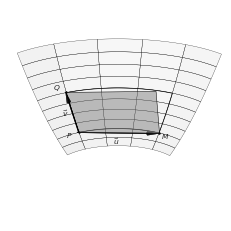

In [26]:
plotname = "fig_Vector_Calc_25c"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limitsz1
scale = .47
ax.set_xlim(0*scale, 2*scale)
ax.set_ylim(0*scale, 2*scale)
ax.set_zlim(.5*scale, 2.5*scale)

# axis arrows
# arrow3d(ax, length=2, width=0.01, head=0.04, headwidth=3, offset=[-.1,0,0], 
#         theta_x= 90, theta_z = 90,  color="black")

# arrow3d(ax, length=2, width=0.01, head=0.04, headwidth=3, offset=[0,-.1,0], 
#         theta_x= -90, theta_z = 0,  color="black")

# arrow3d(ax, length=2, width=0.01, head=0.05, headwidth=3, offset=[0,0,-.1], 
#         theta_x= 0, theta_z = 90,  color="black")

ax.view_init(20, 55)
ax.axis("off")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000

stride = 100

u = np.linspace(-np.pi, -.8*np.pi/2, N)
v = np.linspace(.5, 1, N)
U, V = np.meshgrid(u, v)
ax.plot_surface(V*np.cos(U) + .5, V*np.sin(U) + .5, V**2, color="white", ec="k", alpha=.2, linewidth=.25, rstride=stride, cstride=stride*2)

u = np.linspace(-np.pi*.88, -1.04*np.pi/2, N)
v = np.linspace(.6, .8, N)
U, V = np.meshgrid(u, v)
ax.plot_wireframe(V*np.cos(U) + .5, V*np.sin(U) + .5, V**2, ec="k", linewidth=.75, rstride=N, cstride=N)

ax.scatter(.66, .2, .5, s=2, c="k", zorder=1)
ax.scatter(.71, .1, .81, s=2, c="k", zorder=1)
ax.scatter(.2, .62, .525, s=2, c="k", zorder=1)
ax.text(.75, .2, .5, s="$P$", fontsize=7.5, ha="center", va="center")
ax.text(.85, .2, .9, s="$Q$", fontsize=7.5, ha="center", va="center")
ax.text(.2, .7, .525, s="$M$", fontsize=7.5, ha="center", va="center")

ax.text(.55, .55, .5125, s=r"$\vec{u}$", fontsize=7.5, ha="center", va="center")
ax.text(.75, .15, .66, s=r"$\vec{v}$", fontsize=7.5, ha="center", va="center")

arrow3d(ax, length=.37, width=0.004, head=0.25, headwidth=4, offset=[.66, .2, .5], 
        theta_x= 18, theta_z = 90,  color="black")
arrow3d(ax, length=.72, width=0.004, head=0.15, headwidth=4, offset=[.67, .2, .5], 
        theta_x= -100, theta_z = 80,  color="black")

# x = np.linspace(.2, .7, N)
# z = np.linspace(.5, .81, N)
# X, Z = np.meshgrid(x, z)
# y = lambda x, z : -0.1327/0.14385*x - 0.025/0.14385*z + 0.128852/0.14385

# ax.plot_surface(X, y(X, Z), Z, color="gray", ec="k", alpha=.3, linewidth=.25, rstride=N, cstride=N, zorder=0)

x = [.66, .71, .2, .2]
y = [.2, .1, .57, .62]
z = [.5, .81, .85, .525]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts, color="gray", ec="k", alpha=.5, lw=.5))

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_26

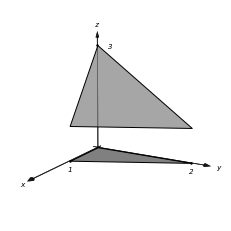

In [404]:
plotname = "fig_Vector_Calc_26"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = 1.1
ax.set_xlim(0*scale, 2*scale)
ax.set_ylim(0*scale, 2*scale)
ax.set_zlim(0*scale, 3*scale)

# axis arrows
arrow3d(ax, length=2.5, width=0.01, head=0.06, headwidth=5, offset=[-.1,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2.5, width=0.01, head=0.05, headwidth=5, offset=[0,-.1,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=3.5, width=0.008, head=0.05, headwidth=4, offset=[0,0,-.1], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 30)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [1, 2, 3]
zoffset = -.25
for tick in ticks:
    if tick == 1:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick == 2:
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick == 3:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(2.55, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 2.55, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 3.6, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
x = [0,0,1]
y = [0,2,0]
z = [0,0,0]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts, color="gray", ec="k", alpha=1))

x = [0,0,1]
y = [0,2,0]
z = [3,1,1]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts, color="gray", ec="k", alpha=.7))

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_27

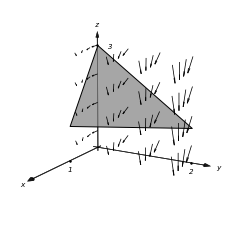

In [442]:
plotname = "fig_Vector_Calc_27"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = 1.1
ax.set_xlim(0*scale, 2*scale)
ax.set_ylim(0*scale, 2*scale)
ax.set_zlim(0*scale, 3*scale)

# axis arrows
arrow3d(ax, length=2.5, width=0.01, head=0.06, headwidth=5, offset=[-.1,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2.5, width=0.01, head=0.05, headwidth=5, offset=[0,-.1,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=3.5, width=0.008, head=0.05, headwidth=4, offset=[0,0,-.1], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 30)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [1, 2, 3]
zoffset = -.25
for tick in ticks:
    if tick == 1:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick == 2:
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick == 3:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(2.55, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 2.55, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 3.6, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
x = [0,0,1]
y = [0,2,0]
z = [3,1,1]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts, color="gray", ec="k", alpha=.7))

N = 4
x = np.linspace(0, .8, N)
y = np.linspace(0, 2, N)
z = np.linspace(.5, 3, N)
X, Y, Z = np.meshgrid(x, y, z)
ax.quiver(X, Y, Z, 1, X, -Y, length=0.2, normalize=False, color="k", linewidths=.75, ec="k")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_28

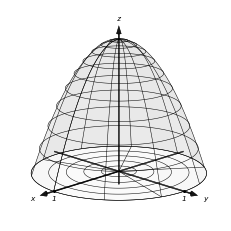

In [486]:
plotname = "fig_Vector_Calc_28"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .7
ax.set_xlim(-1*scale, 1*scale)
ax.set_ylim(-1*scale, 1*scale)
ax.set_zlim(0*scale, 1.3*scale)

# axis arrows
arrow3d(ax, length=2.3, width=0.005, head=0.04, headwidth=4, offset=[-1.1,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2.3, width=0.005, head=0.04, headwidth=4, offset=[0,-1.1,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=1.2, width=0.008, head=0.05, headwidth=3.5, offset=[0,0,-.1], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 45)
ax.axis("off")

tickpointsize = 4
ticksize=7.5
ticks = [1]
zoffset = -.05
for tick in ticks:
    ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
    ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
    ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    # ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
    # ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(1.3, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 1.3, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 1.15, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
t = np.linspace(0, 2*np.pi, N)
r = np.linspace(0, 1, N)
T, R = np.meshgrid(t, r)
z = lambda r : 1 - r**2

stride = 100
ax.plot_surface(R*np.cos(T), R*np.sin(T), z(R), color="w", alpha=.1, linewidth=0, rstride=stride, cstride=stride)
ax.plot_wireframe(R*np.cos(T), R*np.sin(T), z(R), color="k", linewidth=.5, rstride=stride, cstride=stride)
ax.plot_wireframe(R*np.cos(T), R*np.sin(T), z(R*0-1), color="k", linewidth=.5, rstride=stride*2, cstride=stride*2)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_29

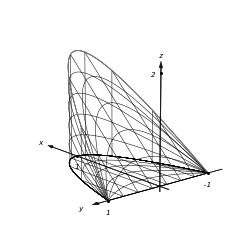

In [78]:
plotname = "fig_Vector_Calc_29"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .95
ax.set_xlim(0*scale, 1*scale)
ax.set_ylim(-1*scale, 1*scale)
ax.set_zlim(0*scale, 2.3*scale)

# axis arrows
arrow3d(ax, length=1.5, width=0.007, head=0.04, headwidth=4, offset=[-.1,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2.6, width=0.005, head=0.04, headwidth=4, offset=[0,-1.3,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=2.3, width=0.005, head=0.05, headwidth=3.5, offset=[0,0,-.1], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 140)
ax.axis("off")

tickpointsize = 4
ticksize=7.5
ticks = [-1, 1, 2]
zoffset = -.2
for tick in ticks:
    if tick == 1:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if np.abs(tick) < 2:
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick > 1:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, .15, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(1.5, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 1.5, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 2.3, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
y = np.linspace(-1, 1, N)
z = np.linspace(0, 2, N)
Y, Z = np.meshgrid(y, z)

stride = 100
ax.plot_wireframe(1-Y**2, Y, 0*Z, color="k", linewidth=.5, rstride=stride, cstride=stride)

N = 6
for a in np.linspace(0, 1, N):
    ax.plot(a*(1-y**2) , y, 0, color="k", linewidth=.5)
    ax.plot(1-y**2, y, 2*a*(1-y**2), color="k", linewidth=.5)
    ax.plot(a*(1-y**2), y, 2*a*(1-y**2), color="k", linewidth=.5)

ax.plot(1-y**2, y, 2*(1-y**2), color="gray", linewidth=1, zorder=5)

for y in np.linspace(-1, 1, 8):
    ax.plot([0, 1-y**2], [y, y], [0, 2*(1-y**2)], color="k", linewidth=.5)
    ax.plot([1-y**2, 1-y**2], [y, y], [0, 2*(1-y**2)], color="k", linewidth=.5)
    ax.plot([0, 1-y**2], [y, y], [0, 0], color="k", linewidth=.5)
fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_30

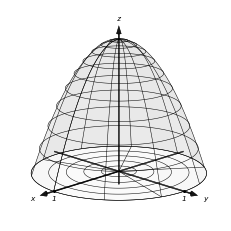

In [79]:
plotname = "fig_Vector_Calc_30"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .7
ax.set_xlim(-1*scale, 1*scale)
ax.set_ylim(-1*scale, 1*scale)
ax.set_zlim(0*scale, 1.3*scale)

# axis arrows
arrow3d(ax, length=2.3, width=0.005, head=0.04, headwidth=4, offset=[-1.1,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2.3, width=0.005, head=0.04, headwidth=4, offset=[0,-1.1,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=1.2, width=0.008, head=0.05, headwidth=3.5, offset=[0,0,-.1], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 45)
ax.axis("off")

tickpointsize = 4
ticksize=7.5
ticks = [1]
zoffset = -.05
for tick in ticks:
    ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
    ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
    ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    # ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
    # ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(1.3, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 1.3, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 1.15, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
t = np.linspace(0, 2*np.pi, N)
r = np.linspace(0, 1, N)
T, R = np.meshgrid(t, r)
z = lambda r : 1 - r**2

stride = 100
ax.plot_surface(R*np.cos(T), R*np.sin(T), z(R), color="w", alpha=.1, linewidth=0, rstride=stride, cstride=stride)
ax.plot_wireframe(R*np.cos(T), R*np.sin(T), z(R), color="k", linewidth=.5, rstride=stride, cstride=stride)
ax.plot_wireframe(R*np.cos(T), R*np.sin(T), z(R*0-1), color="k", linewidth=.5, rstride=stride*2, cstride=stride*2)

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_31

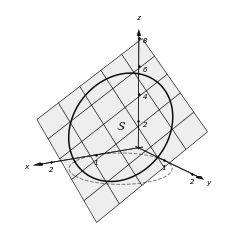

In [130]:
plotname = "fig_Vector_Calc_31"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .91
ax.set_xlim(-.1*scale, 2.5*scale)
ax.set_ylim(-.1*scale, 2.5*scale)
ax.set_zlim(-.1*scale, 9*scale)

# axis arrows
arrow3d(ax, length=2.5, width=0.02, head=0.07, headwidth=4, offset=[-.1,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2.5, width=0.015, head=0.07, headwidth=4, offset=[0,-.1,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=8.75, width=0.008, head=0.05, headwidth=5, offset=[0,0,-.1], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 60)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [1, 2, 4, 6, 8]
zoffset = -.5
for tick in ticks:
    if tick < 3:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick > 1:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(2.55, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 2.55, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 9.5, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-.2, 2.2, N)
y = np.linspace(-.2, 2.2, N)
X, Y = np.meshgrid(x, y)
z = lambda x, y: 7 - 2*x - 2*y

stride = 200
ax.plot_wireframe(X, Y, z(X,Y), color="k", linewidth=.5, rstride=stride, cstride=stride)
ax.plot_surface(X, Y, z(X,Y), color="w", alpha=.1, ec="k",  linewidth=1, rstride=stride, cstride=stride)

t = np.linspace(0, 2*np.pi, N)
ax.plot(np.cos(t) + 1, np.sin(t) + 1, 0, "--", color="gray", linewidth=1)
ax.plot(np.cos(t) + 1, np.sin(t) + 1, z(np.cos(t) + 1, np.sin(t) + 1), color="k", linewidth=1.5)

ax.text(1, 1, z(1, 1), s=r"$\mathcal{S}$", fontsize=12, ha="center", va="center")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_32a

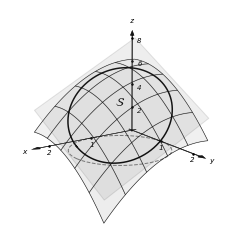

In [134]:
plotname = "fig_Vector_Calc_32a"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .91
ax.set_xlim(-.1*scale, 2.5*scale)
ax.set_ylim(-.1*scale, 2.5*scale)
ax.set_zlim(-1.8*scale, 9*scale)

# axis arrows
arrow3d(ax, length=2.5, width=0.015, head=0.07, headwidth=4, offset=[-.1,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2.5, width=0.015, head=0.07, headwidth=4, offset=[0,-.1,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=8.75, width=0.008, head=0.05, headwidth=5, offset=[0,0,-.1], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 55)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [1, 2, 4, 6, 8]
zoffset = -.5
for tick in ticks:
    if tick < 3:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick > 1:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(2.55, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 2.55, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 9.5, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-.2, 2.2, N)
y = np.linspace(-.2, 2.2, N)
X, Y = np.meshgrid(x, y)
z = lambda x, y: 6 - x**2 - y**2

stride = 200
ax.plot_wireframe(X, Y, z(X,Y), color="k", linewidth=.5, rstride=stride, cstride=stride)
ax.plot_surface(X, Y, z(X,Y), color="w", alpha=.1, ec="k",  linewidth=1, rstride=stride, cstride=stride)

t = np.linspace(0, 2*np.pi, N)
ax.plot(np.cos(t) + 1, np.sin(t) + 1, 0, "--", color="gray", linewidth=1)
ax.plot(np.cos(t) + 1, np.sin(t) + 1, z(np.cos(t) + 1, np.sin(t) + 1), color="k", linewidth=1.5)

ax.text(1, 1, z(1, 1), s=r"$\mathcal{S}$", fontsize=12, ha="center", va="center")

z = lambda x, y: 7 - 2*x - 2*y

stride = 200
# ax.plot_wireframe(X, Y, z(X,Y), color="k", linewidth=.5, rstride=stride, cstride=stride)
ax.plot_surface(X, Y, z(X,Y), color="w", alpha=.1, ec="k",  linewidth=1, rstride=N, cstride=N)


fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')

### fig_Vector_Calc_32b

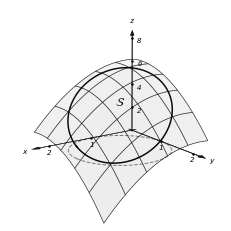

In [4]:
plotname = "fig_Vector_Calc_32b"
scale = 1
fig = plt.figure(figsize=(4*scale,4*scale))
ax = plt.axes(projection='3d')

# setting plot limits
scale = .91
ax.set_xlim(-.1*scale, 2.5*scale)
ax.set_ylim(-.1*scale, 2.5*scale)
ax.set_zlim(-1.8*scale, 9*scale)

# axis arrows
arrow3d(ax, length=2.5, width=0.015, head=0.07, headwidth=4, offset=[-.1,0,0], 
        theta_x= 90, theta_z = 90,  color="black")

arrow3d(ax, length=2.5, width=0.015, head=0.07, headwidth=4, offset=[0,-.1,0], 
        theta_x= -90, theta_z = 0,  color="black")

arrow3d(ax, length=8.75, width=0.008, head=0.05, headwidth=5, offset=[0,0,-.1], 
        theta_x= 0, theta_z = 90,  color="black")

ax.view_init(15, 55)
ax.axis("off")

tickpointsize = 2
ticksize=7.5
ticks = [1, 2, 4, 6, 8]
zoffset = -.5
for tick in ticks:
    if tick < 3:
        ax.scatter3D(tick, 0, 0, s=tickpointsize, c='k')
        ax.text(tick, 0, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
        ax.scatter3D(0, tick, 0, s=tickpointsize, c='k')
        ax.text(0, tick, zoffset, s=tick, fontsize=ticksize, ha="center", va="center")
    if tick > 1:
        ax.scatter3D(0, 0, tick, s=tickpointsize, c='k')
        ax.text(0, .25, tick, s=tick, fontsize=ticksize, ha="center", va="center")

ax.text(2.55, 0, 0, s="x", fontsize=ticksize, ha="center", va="center")
ax.text(0, 2.55, 0, s="y", fontsize=ticksize, ha="center", va="center")
ax.text(0, 0, 9.5, s="z", fontsize=ticksize, ha="center", va="center")

ax.set_box_aspect([1,1,1])

# Plot
N = 1000
x = np.linspace(-.2, 2.2, N)
y = np.linspace(-.2, 2.2, N)
X, Y = np.meshgrid(x, y)
z = lambda x, y: 6 - x**2 - y**2

stride = 200
ax.plot_wireframe(X, Y, z(X,Y), color="k", linewidth=.5, rstride=stride, cstride=stride)
ax.plot_surface(X, Y, z(X,Y), color="w", alpha=.1, ec="k",  linewidth=1, rstride=stride, cstride=stride)

t = np.linspace(0, 2*np.pi, N)
ax.plot(np.cos(t) + 1, np.sin(t) + 1, 0, "--", color="gray", linewidth=1)
ax.plot(np.cos(t) + 1, np.sin(t) + 1, z(np.cos(t) + 1, np.sin(t) + 1), color="k", linewidth=1.5)

ax.text(1, 1, z(1, 1), s=r"$\mathcal{S}$", fontsize=12, ha="center", va="center")

fig.savefig(f"plots/{plotname}.pdf", pad_inches=0.01, transparent="True", bbox_inches='tight')